Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [97]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

### a) Importing a csv file [2 pts]

Import the csv files of allof your subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [100]:
import glob
import os

PATH = os.getcwd()+ "/Data"
all_files = glob.glob(os.path.join(PATH, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
                                                       # http://www.oipapio.com/question-88634    
concatenation = []

for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0)
    concatenation.append(df)
df_concatenated = pd.concat(concatenation) # TODO

# use pd.set_option here to display in a nice way
# TODO

# save concatenated dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated.csv'
# TODO
try:
    os.mkdir(os.getcwd() + '/Processed/')
except OSError as err:
    print("Directory already exists.")

df_concatenated.to_csv(DATAPATH)

Directory already exists.


### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False* (0). True: 1

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [101]:
# add a column "congruence"
# TODO
df_concatenated['congruence'] = 1
# create a new dataframe with averaged data

list_for_indices = [] #make list with increasing numbers from 1 to max(number of lines in df_concatenated)
for index in range(len(df_concatenated)):
    list_for_indices.append(int(index))
                            
df_concatenated['index'] = list_for_indices #make list with increasing numbers to index (each line has 
df_concatenated.set_index("index", inplace = True) #a seperate index now, no doubling anymore)

for index in range(len(df_concatenated)):  #compare stimulustype and response, if inconcruent set value 
    stimulus_type = df_concatenated.iloc[index]['StimulusType'] #for 'congruence' to0
    response = df_concatenated.iloc[index]['response']
    if stimulus_type != response:
        df_concatenated.set_value(index, 'congruence', 0)

subject = ''
l_all_subjects =[] #empty list to store all subjects
for index in range(len(df_concatenated)):
    if subject != df_concatenated.iloc[index]['SubjectID']: #if subject is not current subject
        l_all_subjects.append(df_concatenated.iloc[index]['SubjectID']) #add current to lust
        subject = df_concatenated.iloc[index]['SubjectID'] #make current new comparison    

count = 0
list_sum_rt = [] 
list_of_avg = []
list_sum_congruence = []
list_all_cong = []

while(count < len(df_concatenated)): #go through whole list
    for index in range(100): #100 in a row: 1 subject
        if(df_concatenated.iloc[count]['RT'] == 0): #if RT was 0: do nothing
            pass
        else:
            list_sum_rt.append(df_concatenated.iloc[count]['RT']) #otherwise append rt to list of rt
        count +=1 # after each datapoint: count += 1
    average = int(sum(list_sum_rt)/len(list_sum_rt)) #as 1 subject is done: calc avg
    list_of_avg.append(average) #append avg to list of all avg
    list_sum_rt = [] #set list for adding up rt of one subject to []

count = 0 
while(count < len(df_concatenated)): #go through whole list
    for index in range(100): #100 in a row: 1 subject
        list_sum_congruence.append(df_concatenated.iloc[count]['congruence']) #append val of congruence to list
        count+=1 #of congruences, as 1 datapoint is done: count += 1
       # print(df_concatenated.iloc[count]['congruence'])
    avg_cong = sum(list_sum_congruence)/len(list_sum_congruence) #
    list_all_cong.append(avg_cong)
    list_sum_congruence = []


df_concatenated_avg = pd.DataFrame() #make new df_conc_avg df with avg rt, accuracy
df_concatenated_avg['SubjectID'] = l_all_subjects
df_concatenated_avg['avg_RT'] = list_of_avg
df_concatenated_avg['accuracy'] = list_all_cong

print(df_concatenated_avg)

DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged.csv'
# TODO

df_concatenated_avg.to_csv(DATAPATH)

/home/yasar/anaconda3/envs/acc/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


        SubjectID  avg_RT  accuracy
0  SubjectSimon02     302      0.97
1               1     352      0.95
2               2     295      0.98
3               4     342      0.98
4  SubjectSimon01     306      0.97
5               3     337      0.97
6               1     304      0.96
7               2     359      0.98


## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

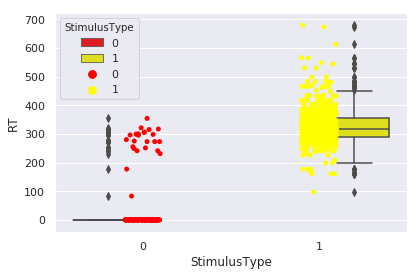

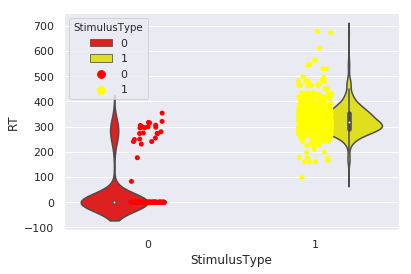

In [103]:
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")

# create two axes
fig, ax1 = plt.subplots(nrows=1,ncols=1)

# first subplot with stripplot and boxplot
# TODO 
ax1 = sns.boxplot(x='StimulusType', y='RT', hue='StimulusType', data=data_concat, palette=["red", "yellow"])
ax1 = sns.stripplot(x='StimulusType', y='RT', hue='StimulusType', data=data_concat, jitter=True, palette=["red", "yellow"])

# second subplot with stripplot and violinplot
# TODO
fig2, ax2 = plt.subplots(nrows=1, ncols=1)
ax2 = sns.stripplot(x='StimulusType', y='RT', hue='StimulusType', data=data_concat, jitter=True, palette=["red", "yellow"])
ax2 = sns.violinplot(x='StimulusType', y='RT', hue="StimulusType", data = data_concat, palette=["red", "yellow"])


# handling legends
# TODO

fig.tight_layout()

### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

/home/yasar/anaconda3/envs/acc/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


        SubjectID  avg_RT  accuracy
0  SubjectSimon02     302      0.97
1               1     352      0.95
2               2     295      0.98
3               4     342      0.98
4  SubjectSimon01     306      0.97


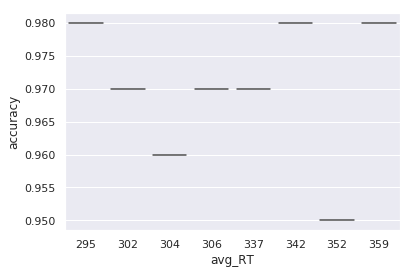

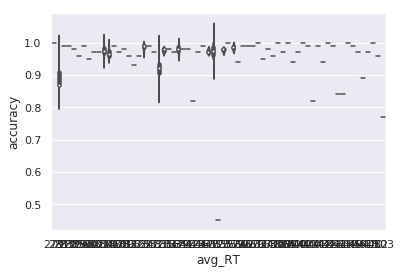

In [104]:
# again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID
# TODO
PATH = os.getcwd()+ "/All_Groups"
all_files = glob.glob(os.path.join(PATH, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
                                                       # http://www.oipapio.com/question-88634    
concatenation = []

for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0)    
    concatenation.append(df)
df_concatenated = pd.concat(concatenation) # TODO

df_concatenated['congruence'] = 1

list_for_indices = [] #make list with increasing numbers from 1 to max(number of lines in df_concatenated)
for index in range(len(df_concatenated)):
    list_for_indices.append(int(index))
                            
df_concatenated['index'] = list_for_indices #make list with increasing numbers to index (each line has 
df_concatenated.set_index("index", inplace = True) #a seperate index now, no doubling anymore)

count_subj=0
count=0

while(count < len(df_concatenated)): #go through whole list
    for index in range(100): #100 in a row: 1 subject
        if(count_subj<10): #diff naming for different subject ID length
            df_concatenated.at[count,'SubjectID'] = 'XX00' + str(count_subj)
        if(count_subj<100) and (count_subj>=10):
            df_concatenated.at[count,'SubjectID'] = 'XX0'+str(count_subj)
        if(count_subj<1000) and (count_subj>=100):
            df_concatenated.at[count,'SubjectID'] = 'XX'+str(count_subj)
        count +=1 # after each datapoint: count += 1
    count_subj += 1 

for index in range(len(df_concatenated)):  #compare stimulustype and response, if inconcruent set value 
    stimulus_type = df_concatenated.iloc[index]['StimulusType'] #for 'congruence' to0
    response = df_concatenated.iloc[index]['response']
    if stimulus_type != response:
        df_concatenated.set_value(index, 'congruence', 0)

subject = ''
l_all_subjects =[] #empty list to store all subjects
for index in range(len(df_concatenated)):
    if subject != df_concatenated.iloc[index]['SubjectID']: #if subject is not current subject
        l_all_subjects.append(df_concatenated.iloc[index]['SubjectID']) #add current to lust
        subject = df_concatenated.iloc[index]['SubjectID'] #make current new comparison    

count = 0
list_sum_rt = [] 
list_of_avg = []
list_sum_congruence = []
list_all_cong = []

while(count < len(df_concatenated)): #go through whole list
    for index in range(100): #100 in a row: 1 subject
        if(df_concatenated.iloc[count]['RT'] == 0): #if RT was 0: do nothing
            pass
        else:
            list_sum_rt.append(df_concatenated.iloc[count]['RT']) #otherwise append rt to list of rt
        count +=1 # after each datapoint: count += 1
    average = int(sum(list_sum_rt)/len(list_sum_rt)) #as 1 subject is done: calc avg
    list_of_avg.append(average) #append avg to list of all avg
    list_sum_rt = [] #set list for adding up rt of one subject to []

count = 0 
while(count < len(df_concatenated)): #go through whole list
    for index in range(100): #100 in a row: 1 subject
        list_sum_congruence.append(df_concatenated.iloc[count]['congruence']) #append val of congruence to list
        count+=1 #of congruences, as 1 datapoint is done: count += 1
    avg_cong = sum(list_sum_congruence)/len(list_sum_congruence) #
 
    list_all_cong.append(avg_cong)
    list_sum_congruence = []


df_concatenated_avg_all_groups = pd.DataFrame() #make new df_conc_avg df with avg rt, accuracy
df_concatenated_avg_all_groups['SubjectID'] = l_all_subjects
df_concatenated_avg_all_groups['avg_RT'] = list_of_avg
df_concatenated_avg_all_groups['accuracy'] = list_all_cong


# Now it's time to plot your results
#figs, axes = plt.subplots(nrows=2, ncols=2, sharey="row")

# violin plot for your group's data
# TODO
print(df_concatenated_avg.head())
fig2, ax2 = plt.subplots(nrows=1, ncols=1)
ax2 = sns.violinplot(x='avg_RT', y='accuracy', data = df_concatenated_avg, palette=["red", "yellow"])


# handling legends
# TODO

fig.tight_layout()
# violin plot of all group's data
# TODO

fig2, ax2 = plt.subplots(nrows=1, ncols=1)
ax2 = sns.violinplot(x='avg_RT', y='accuracy', data = df_concatenated_avg_all_groups, palette=["red", "yellow"])



Compare two datasets and relate it with CLT. Write your opinion here.

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

  SubjectID  avg_RT  accuracy
0     XX000     357      1.00
1     XX001     367      0.99
2     XX002     355      0.98
3     XX003     431      0.84
4     XX004     308      0.97


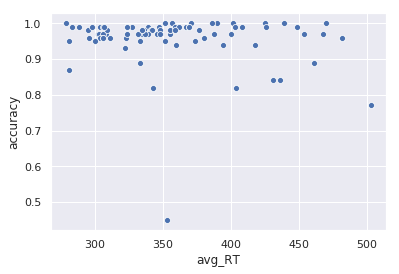

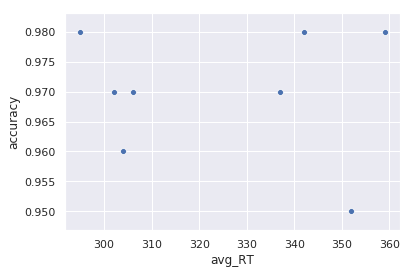

In [106]:
fig2, ax2 = plt.subplots(nrows=1, ncols=1)
ax2 = sns.scatterplot(x='avg_RT', y='accuracy', data = df_concatenated_avg_all_groups, palette=["red", "yellow"])

fig2, ax2 = plt.subplots(nrows=1, ncols=1)
ax2 = sns.scatterplot(x='avg_RT', y='accuracy', data = df_concatenated_avg, palette=["red", "yellow"])
